In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

In [2]:
df_loc = pd.read_csv('GrowLocations.csv')

In [3]:
df_loc = df_loc.drop_duplicates(['Latitude', 'Longitude']).copy()

In [4]:
df_loc['tmp'] = df_loc['Latitude']
df_loc['Latitude'] = df_loc['Longitude']
df_loc['Longitude'] = df_loc['tmp']

In [5]:
(df_loc['Latitude'] > 100).sum()

9

In [6]:
df_loc = df_loc[df_loc.Latitude < 100]

In [7]:
df_loc.shape

(2160, 9)

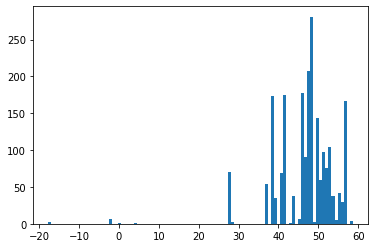

In [8]:
plt.hist(df_loc.Latitude, bins=100);

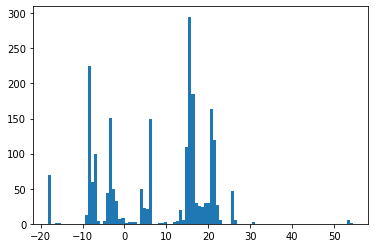

In [9]:
plt.hist(df_loc.Longitude, bins=100);

In [10]:
df_loc.head()

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,tmp
0,PI040298AD5J215142,54.980,-7.923,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,-7.923
6,PI040298AD5J215095,54.964,-7.968,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_fqzb9jsq,2018-10-17T13:31:11.000Z,2018-12-29T09:40:49.000Z,-7.968
12,PI040298AD5J214214,54.979,-7.922,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_mqe06kvv,2018-10-17T13:22:33.000Z,2018-10-17T14:07:33.000Z,-7.922
18,PI040298AD5J214635,54.981,-7.924,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_xw97j79a,2018-10-17T13:02:55.000Z,2018-10-17T14:32:55.000Z,-7.924
24,PI040298AD5G203425,54.980,-7.924,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_fzja2fbn,2018-10-17T13:11:22.000Z,2018-10-17T13:56:22.000Z,-7.924


In [11]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

In [12]:
polys = gpd.read_file('AWC_SUB.kml', driver='KML')

In [13]:
polys

,Name,Description,geometry
0,Very low ( ~ 0 mm/m),,GEOMETRYCOLLECTION Z (POLYGON Z ((24.59069 65....
1,Low ( < 100 mm/m),,GEOMETRYCOLLECTION Z (POLYGON Z ((26.25840 69....
2,Medium (100 - 140 mm/m),,GEOMETRYCOLLECTION Z (POLYGON Z ((26.05928 66....
3,High (140 - 190 mm/m),,GEOMETRYCOLLECTION Z (POLYGON Z ((28.50954 68....
4,Very high ( > 190 mm/m),,GEOMETRYCOLLECTION Z (POLYGON Z ((27.81335 59....
5,Other values,,GEOMETRYCOLLECTION Z (POLYGON Z ((28.36491 69....


In [14]:
gdf_loc = gpd.GeoDataFrame(df_loc, geometry=gpd.points_from_xy(df_loc.Longitude, df_loc.Latitude))

In [15]:
gdf_loc

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,tmp,geometry
0,PI040298AD5J215142,54.980,-7.923,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,-7.923,POINT (-7.92300 54.98000)
6,PI040298AD5J215095,54.964,-7.968,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_fqzb9jsq,2018-10-17T13:31:11.000Z,2018-12-29T09:40:49.000Z,-7.968,POINT (-7.96800 54.96400)
12,PI040298AD5J214214,54.979,-7.922,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_mqe06kvv,2018-10-17T13:22:33.000Z,2018-10-17T14:07:33.000Z,-7.922,POINT (-7.92200 54.97900)
18,PI040298AD5J214635,54.981,-7.924,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_xw97j79a,2018-10-17T13:02:55.000Z,2018-10-17T14:32:55.000Z,-7.924,POINT (-7.92400 54.98100)
24,PI040298AD5G203425,54.980,-7.924,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_fzja2fbn,2018-10-17T13:11:22.000Z,2018-10-17T13:56:22.000Z,-7.924,POINT (-7.92400 54.98000)
...,...,...,...,...,...,...,...,...,...,...
38898,PI040298AD5I213585,27.776,-18.006,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5jg3tpsn,2019-08-21T09:04:37.000Z,2019-10-28T11:19:37.000Z,-18.006,POINT (-18.00600 27.77600)
39036,PI040307AA4D026612,45.479,9.229,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_ssemrejr,2019-10-22T11:44:34.000Z,2019-10-29T10:07:42.000Z,9.229,POINT (9.22900 45.47900)
39120,PI040307AA4E027471,50.891,15.558,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_w52zq9bd,2019-09-24T15:40:38.000Z,2019-10-29T11:10:38.000Z,15.558,POINT (15.55800 50.89100)
39138,"PI040307AA4E027885. FuturePractice:,Id:1035,La...",50.890,15.555,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_r72sbzbg,2019-08-12T03:43:43.000Z,2019-10-29T10:58:43.000Z,15.555,POINT (15.55500 50.89000)


In [18]:
# geonow = polys.loc[0, 'geometry'].buffer(0)

print(geonow.is_valid)

pip_mask_now = gdf_loc.within(geonow)

df_loc['Within0'] = pip_mask_now

True


In [19]:
df_loc['Within0'].sum()

57

In [129]:
from shapely.strtree import STRtree

In [130]:
tree = STRtree(geonow)

In [134]:
from shapely.geometry import Point

In [146]:
pointnow = Point(df_loc.iloc[0].Longitude, df_loc.iloc[0].Latitude)
asd = tree.query(pointnow)[0]

In [145]:
asd

In [ ]:
tree.query()

In [153]:
gdf_loc.iloc[0]

Serial                                    PI040298AD5J215142
Latitude                                               54.98
Longitude                                             -7.923
Type          Thingful.Connectors.GROWSensors.AirTemperature
SensorType                                      Flower Power
Code                          Grow.Thingful.Sensors_5tjrqt1c
BeginTime                           2018-10-17T13:14:07.000Z
EndTime                             2018-10-17T13:59:07.000Z
tmp                                                   -7.923
geometry                    POINT (-7.922999999999999 54.98)
Name: 0, dtype: object

In [155]:
tree2 = STRtree(gdf_loc.geometry)

In [157]:
asd = tree2.query(geonow)

In [158]:
len(asd)

32268

In [159]:
gdf_loc.shape

(39240, 10)

In [172]:
dsa = asd[2]

In [173]:
dsa.x, dsa.y

(8.0, 37.0)

In [174]:
for dsa in asd:
    print(dsa.x, dsa.y)

8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
8.0 37.0
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.775 37.071999999999996
-8.79 37.102
-8.787 37.102
-8.79 37.102
-8.79 37.102
-8.79 37.102
-8.79 37.102
-8.79 37.102
-8.787 37.102
-8.787 37.102
-8.787 37.102
-8.787 37.102
-8.789 37.102
-8.789 37.102
-8.79 37.102
-8.79 37.102
-8.79 37.102
-8.79 37.102
-8.79 37.102
-8.79 37.102
-8.789 37.102
-8.789 37.102
-8.789 37.102
-8.789 37.102
-8.79 37.102
-8.789 37.102
-8.787 37.102
-8.787 37.102
-8.787 37.102
-8.787 37.102
-8.787 37.102
-8.787 37.102
-8.789 37.102
-8.79 37.102
-8.79 37.102
-8.787 37.102
-8.79 37.102
-8.79 37.102
-8.789 37.102
-8.789 37.102
-8.789 37.102
-8.789 37.102
-8.789 37.102
-8.789 37

-8.635 37.14
-8.634 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.635 37.14
-8.629 37.14
-8.629 37.14
-8.629 37.14
-8.632 37.14
-8.629 37.14
-8.629 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.629 37.14
-8.629 37.14
-8.629 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.629 37.14
-8.629 37.14
-8.629 37.14
-8.629 37.14
-8.635 37.14
-8.632 37.14
-8.632 37.14
-8.632 37.14
-8.629 37.14
-8.632 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.632 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.635 37.14
-8.632 37.14

-8.572000000000001 38.104
-8.572000000000001 38.104
-8.573 38.104
-8.573 38.104
-8.573 38.104
-8.573 38.104
-8.573 38.104
-8.574 38.104
-8.579 38.104
-8.578 38.104
-8.577 38.104
-8.581 38.104
-8.575 38.104
-8.575 38.104
-8.575 38.104
-8.575 38.104
-8.575 38.104
-8.579 38.104
-8.579 38.104
-8.578 38.104
-8.579 38.104
-8.579 38.104
-8.579 38.104
-8.578 38.104
-8.578 38.104
-8.578 38.104
-8.578 38.104
-8.578 38.104
-8.573 38.104
-8.577 38.104
-8.58 38.104
-8.58 38.104
-8.58 38.104
-8.581 38.104
-8.581 38.104
-8.581 38.104
-8.581 38.104
-8.571 38.104
-8.581 38.104
-8.577 38.104
-8.58 38.104
-8.577 38.104
-8.579 38.104
-8.577 38.104
-8.577 38.104
-8.577 38.104
-8.578 38.104
-8.578 38.104
-8.578 38.104
-8.578 38.104
-8.574 38.104
-8.577 38.104
-8.577 38.104
-8.577 38.104
-8.577 38.104
-8.577 38.104
-8.577 38.104
-8.573 38.104
-8.574 38.104
-8.574 38.104
-8.574 38.104
-8.577 38.104
-8.574 38.104
-8.574 38.104
-8.582 38.104
-8.58 38.104
-8.58 38.104
-8.58 38.104
-8.58 38.104
-8.58 38.104
-8.58

-8.568 38.107
-8.591000000000001 38.107
-8.591000000000001 38.107
-8.591000000000001 38.107
-8.591000000000001 38.107
-8.584 38.107
-8.571 38.107
-8.571 38.107
-8.571 38.107
-8.568 38.107
-8.591000000000001 38.107
-8.568 38.107
-8.585 38.107
-8.568 38.107
-8.568 38.107
-8.591000000000001 38.107
-8.591000000000001 38.107
-8.592 38.107
-8.57 38.107
-8.592 38.107
-8.568999999999999 38.107
-8.577 38.107
-8.568999999999999 38.107
-8.568999999999999 38.107
-8.57 38.107
-8.57 38.107
-8.568999999999999 38.107
-8.568 38.107
-8.585 38.107
-8.585 38.107
-8.577 38.107
-8.568999999999999 38.107
-8.571 38.107
-8.57 38.107
-8.57 38.107
-8.57 38.107
-8.57 38.107
-8.57 38.107
-8.57 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.592 38.107
-8.592 38.107
-8.581 38.107
-8.581 38.107
-8.581 38.107
-8.568 38.107
-8.577 38.107
-8.577 38.107
-8.592 38.107
-8.571 38.107
-8.57 38.107
-8.592 38.107
-8.592 38.10

-8.582 38.109
-8.582 38.109
-8.582 38.109
-8.57 38.109
-8.587 38.109
-8.587 38.109
-8.591000000000001 38.109
-8.57 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.591000000000001 38.109
-8.57 38.109
-8.57 38.109
-8.57 38.109
-8.57 38.109
-8.57 38.109
-8.587 38.109
-8.57 38.109
-8.57 38.109
-8.57 38.109
-8.57 38.109
-8.57 38.109
-8.587 38.109
-8.568 38.109
-8.568 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.571 38.109
-8.587 38.109
-8.587 38.109
-8.587 38.109
-8.581 38.109
-8.587 38.109
-8.587 38.109
-8.591000000000001 38.109
-8.591000000000001 38.109
-8.587 38.109
-8.591000000000001 38.109
-8.591000000000001 38.109
-8.587 38.109
-8.572000000000001 38.109
-8.572000000000001 38.109
-8.572000000000001 38.109
-8.587 38.109
-8.572000000000001 38.109
-8.572000000000001 38.109
-8.572000000000001 38.109
-8.572000000000001 38.109
-8

-8.591000000000001 38.111999999999995
-8.574 38.111999999999995
-8.574 38.111999999999995
-8.574 38.111999999999995
-8.574 38.111999999999995
-8.591000000000001 38.111999999999995
-8.591000000000001 38.111999999999995
-8.591000000000001 38.111999999999995
-8.577 38.111999999999995
-8.591000000000001 38.111999999999995
-8.574 38.111999999999995
-8.574 38.111999999999995
-8.578 38.111999999999995
-8.574 38.111999999999995
-8.574 38.111999999999995
-8.574 38.111999999999995
-8.574 38.111999999999995
-8.591000000000001 38.111999999999995
-8.578 38.111999999999995
-8.578 38.111999999999995
-8.578 38.111999999999995
-8.578 38.111999999999995
-8.578 38.111999999999995
-8.578 38.111999999999995
-8.577 38.111999999999995
-8.57 38.113
-8.57 38.113
-8.591000000000001 38.113
-8.591000000000001 38.113
-8.572000000000001 38.113
-8.572000000000001 38.113
-8.591000000000001 38.113
-8.591000000000001 38.113
-8.591000000000001 38.113
-8.572000000000001 38.113
-8.591000000000001 38.113
-8.572000000000001

26.051 40.836999999999996
26.052 40.836999999999996
26.052 40.836999999999996
26.052 40.836999999999996
26.051 40.836999999999996
26.051 40.836999999999996
25.998 40.836999999999996
25.998 40.836999999999996
25.998 40.836999999999996
25.998 40.836999999999996
26.051 40.836999999999996
25.998 40.836999999999996
26.051 40.836999999999996
26.051 40.836999999999996
26.051 40.836999999999996
26.051 40.836999999999996
26.051 40.836999999999996
26.052 40.836999999999996
26.053 40.836999999999996
25.997 40.836999999999996
25.997 40.836999999999996
26.052 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
26.053 40.836999999999996
25.997 40.836999999999996
26.053 40.836999999999996
26.052 40.836999999999996
25.997 40.836999999999996
26.052 40.836999999999996
26.053 40.83

25.851 40.89
25.853 40.89
25.853 40.89
25.853 40.89
25.853 40.89
25.853 40.89
25.853 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851999999999997 40.89
25.851999999999997 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851999999999997 40.89
25.851999999999997 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851999999999997 40.89
25.851 40.89
25.851 40.89
25.851999999999997 40.89
25.

15.619000000000002 41.357
15.619000000000002 41.357
15.612 41.357
15.612 41.357
15.612 41.357
15.612 41.357
15.612 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.612 41.357
15.612 41.357
15.620999999999999 41.357
15.620999999999999 41.357
15.622 41.357
15.620999999999999 41.357
15.622 41.357
15.622 41.357
15.622 41.357
15.622 41.357
15.622 41.357
15.619000000000002 41.357
15.620999999999999 41.357
15.620999999999999 41.357
15.622 41.357
15.620999999999999 41.357
15.620999999999999 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.622 41.357
15.619000000000002 41.357
15.622 41.357
15.622 41.357
15.622 41.357
15.619000000000002 41.357
15.622 41.357
15.622 41.357
15.622 41.357
15.622 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15.622 41.357
15.619000000000002 41.357
15.619000000000002 41.357
15

15.625 41.467
15.620999999999999 41.467
15.620999999999999 41.467
15.620999999999999 41.467
15.620999999999999 41.467
15.620999999999999 41.467
15.625 41.467
15.625 41.467
15.625 41.467
15.62 41.467
15.625 41.467
15.625 41.467
15.625 41.467
15.62 41.467
15.625 41.467
15.625 41.467
15.625 41.467
15.625 41.467
15.62 41.467
15.62 41.467
15.620999999999999 41.467
15.620999999999999 41.467
15.620999999999999 41.467
15.625 41.467
15.783 41.468
15.783 41.468
15.620999999999999 41.468
15.620999999999999 41.468
15.620999999999999 41.468
15.620999999999999 41.468
15.620999999999999 41.468
15.625 41.468
15.783 41.468
15.620999999999999 41.468
15.62 41.468
15.624 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.783 41.468
15.783 41.468
15.783 41.468
15.624 41.468
15.624 41.468
15.624 41.468
15.624 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.623 41.468
15.625 41.4

16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.267 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.262999999999998 43.535
16.267 43.535
16.262999999999998 43.535
16.2629999

16.448 45.806000000000004
16.448 45.806000000000004
16.442999999999998 45.806000000000004
16.448 45.806000000000004
16.442999999999998 45.806000000000004
16.442999999999998 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.442999999999998 45.806000000000004
16.442999999999998 45.806000000000004
16.442999999999998 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.442999999999998 45.806000000000004
16.442999999999998 45.806000000000004
16.442999999999998 45.806000000000004
16.442999999999998 45.806000000000004
16.442999999999998 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806000000000004
16.448 45.806999999999995
16.442 45.806999999999995
16.442 45.806999999999995
16.442 45.806999999999995
16.442 45.806999999999995
16.442 45.

16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.47 45.836000000000006
16.47 45.836000000000006
16.47 45.836000000000006
16.5 45.836000000000006
16.47 45.836000000000006
16.47 45.836000000000006
16.47 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.836000000000006
16.5 45.83

13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.747 45.891000000000005
13.754000000000001 45.893
13.754000000000001 45.893
13.754000000000001 45.893
13.754000000000001 45.893
13.754000000000001 45.893
13.754000000000001 45.893
13.754000000

19.647000000000002 46.658
19.647000000000002 46.658
19.647000000000002 46.658
19.647000000000002 46.658
19.647000000000002 46.658
19.647000000000002 46.658
17.173 46.67100000000001
17.173 46.67100000000001
17.173 46.67100000000001
17.173 46.67100000000001
17.173 46.67100000000001
17.173 46.67100000000001
16.019000000000002 46.696000000000005
16.019000000000002 46.696000000000005
16.019000000000002 46.696000000000005
16.019000000000002 46.696000000000005
16.019000000000002 46.696000000000005
16.019000000000002 46.696000000000005
14.921 46.70399999999999
14.921 46.70399999999999
14.921 46.70399999999999
15.953 46.70399999999999
14.921 46.70399999999999
14.921 46.70399999999999
15.953 46.70399999999999
15.953 46.70399999999999
15.953 46.70399999999999
15.953 46.70399999999999
15.953 46.70399999999999
14.921 46.70399999999999
16.078 46.721000000000004
16.078 46.721000000000004
16.078 46.721000000000004
16.078 46.721000000000004
16.078 46.721000000000004
16.078 46.721000000000004
14.884 46.

16.208 47.578
16.207 47.578
16.207 47.578
16.208 47.578
16.208 47.578
16.208 47.578
16.208 47.578
16.208 47.578
16.208 47.578
16.209 47.578
16.209 47.578
16.208 47.578
16.209 47.578
16.209 47.578
16.207 47.578
16.209 47.578
16.209 47.578
16.207 47.578
16.208 47.578
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.2 47.581
16.199 47.581
16.199 47.581
16.2 47.581
16.2 47.581
16.199 47.581
16.2 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.2 47.581
16.199 47.581
16.2 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.581
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.199 47.582
16.1

20.578000000000003 47.863
20.584 47.863
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.58 47.865
20.58 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.58 47.865
20.58 47.865
20.599 47.865
20.599 47.865
20.599 47.865
20.599 47.865
20.599 47.865
20.599 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.58 47.865
20.404 47.865
20.621 47.865
20.621 47.865
20.404 47.865
20.621 47.865
20.58 47.865
20.621 47.865
20.621 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.404 47.865
20.621 47.865
20.404 47.86600000000001
20.59 47.86600000000001
20.59 47.86600000000001
20.59 47.86600000000001
20.59 47.86600000000001
20.40

15.761 48.055
15.76 48.055
15.76 48.055
15.761 48.055
15.761 48.055
15.761 48.055
15.761 48.055
15.761 48.055
15.761 48.055
15.758 48.055
15.761 48.055
15.758 48.055
15.76 48.055
15.759 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.758 48.056000000000004
15.758 48.056000000000004
15.758 48.056000000000004
15.758 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.758 48.056000000000004
15.758 48.056000000000004
15.759 48.056000000000004
15.758 48.056000000000004
15.76 48.056000000000004
15.758 48.056000000000004
15.76 48.056000000000004
15.76 48.056000000000004
15.76 48.056000000000004
15.76 48.056000000000004
15.76 48.056000000000004
15.76 48.056000000000004
15.758 48.056000000000004
15.759 48.056000000000004
15.759 48.056000000000004
15.758 48.056000000000004
15.759 48.056000000000

20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.769000000000002 48.105
20.628 48.107
20.628 48.107
20.628 48.

15.148 48.153999999999996
15.148 48.153999999999996
15.147 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.145999999999999 48.153999999999996
15.147 48.153999999999996
15.148 48.153999999999996
15.147 48.153999999999996
15.147 48.153999999999996
15.147 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.145999999999999 48.153999999999996
15.148 48.153999999999996
15.145999999999999 48.153999999999996
15.145999999999999 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.145999999999999 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.148 48.153999999999996
15.1

21.303 48.169
21.307 48.169
21.307 48.169
21.307 48.169
21.307 48.169
21.307 48.169
21.307 48.169
21.298000000000002 48.169
21.299 48.169
21.298000000000002 48.169
21.298000000000002 48.169
21.298000000000002 48.169
21.303 48.169
21.303 48.169
21.315 48.169
21.303 48.169
21.303 48.169
21.303 48.169
21.298000000000002 48.169
21.308000000000003 48.169
21.308000000000003 48.169
21.308000000000003 48.169
21.308000000000003 48.169
21.308000000000003 48.169
21.308000000000003 48.169
21.299 48.169
21.299 48.169
21.315 48.169
21.315 48.169
21.311999999999998 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.314 48.169
21.311999999999998 48.169
21.311999999999998 48.169
21.311999999999998 48.169
21.304000000000002 48.169
21.304000000000002 48.169
21.304000000000002 48.169
21.304000000000002 48.169
21.304000000000002 48.169
21.304000000000002 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315 48.169
21.315

20.976999999999997 48.288000000000004
20.976999999999997 48.288000000000004
20.976999999999997 48.288000000000004
20.976999999999997 48.288000000000004
20.976999999999997 48.288000000000004
20.986 48.29600000000001
20.986 48.29600000000001
20.986 48.29600000000001
20.986 48.29600000000001
20.986 48.29600000000001
20.986 48.29600000000001
21.058000000000003 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.059 48.302
21.059 48.302
21.059 48.302
21.059 48.302
21.059 48.302
21.059 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.06 48.302
21.059 48.302
21.059 48.302
21.06 48.302
21.06 48.302
21.06 48.302
21.06 48.302
21.06 48.302
21.059 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.058000000000003 48.302
21.059 48.302
21.059 48.302
21.059 48.302
21.06 48.303000000000004
21.06 48.303000000000004
21.061999999999998 48.303000000000004
21.06199999999

6.229 49.59
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.229 49.591
6.184 49.596000000000004
6.184 49.596000000000004
6.184 49.596000000000004
6.184 49.596000000000004
6.184 49.596000000000004
6.184 49.596000000000004
6.142 49.597
6.142 49.597
6.185 49.597
6.142 49.597
6.142 49.597
6.142 49.597
6.185 49.597
6.185 49.597
6.142 49.597
6.185 49.597
6.185 49.597
6.185 49.597
6.132000000000001 49.602
6.132000000000001 49.602
6.132000000000001 49.602
6.132000000000001 49.602
6.132000000000001 49.602
6.132000000000001 49.602
6.12 49.605
6.12 49.605
6.12 49.605
6.12 49.605
6.12 49.605
6.12 49.605
6.104 49.608000000000004
6.104 49.608000000000004
6.104 49.608000000000004
6.1739999999999995 49.608000000000004
6.104 49.608000000000004
6.104 49.608000000000004
6.104 49.608000000000004
6.104 49.608000000000004
6.104 49.608000000000004
6.104 49.608000000000004
6.104 49.608000000000004
6.17399999999999

-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.396 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.396 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.396 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-4.397 50.383
-3.6639999999999997 50.391999999999996
-3.6639999999999997 50.391999999999996
-3.6639999999999997 50.391999999999996
-3.6639999999999997 50.391999999999996
-3.6639999999999997 50.391999999999996
-3.6639999999999997 50.391999999999996
-3.6639999999999997 50.394
-3.6639999999999997 50.394
-3.6639999999999997 50.394
-3.6639999999999997 50.394
-3.6639999999999997 50.394
-3.663999999999

15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.708 51.013000000000005
15.707 51.013999999999996
15.707 51.013999999999996
15.707 51.013999999999996
15.707 51.013999999999996
15.707 51.013999999999996
15.707 51.013999999999996
-0.337 51.147
-0.336 51.147
-0.336 51.147
-0.336 51.147
-0.337 51.147
-0.337 51.147
-0.337 51.147
-0.337 51.147
-0.336 51.147
-0.336 51.147
-0.336 51.147
-0.337 51.147
5.388 51.155
5.388 51.155
5.388 51.155
5.388 51.155
5.388 51.155
5.388 51.155
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.556 51.351000000000006
5.5729999999999995 51.367
5.5729999999

5.337999999999999 51.596000000000004
5.337999999999999 51.596000000000004
3.78 51.596000000000004
5.337999999999999 51.596000000000004
5.3389999999999995 51.596000000000004
5.3389999999999995 51.596000000000004
5.337999999999999 51.596000000000004
3.79 51.596000000000004
3.79 51.596000000000004
3.79 51.596000000000004
3.79 51.596000000000004
3.79 51.596000000000004
5.337999999999999 51.596000000000004
5.3389999999999995 51.596000000000004
5.337999999999999 51.596000000000004
3.7889999999999997 51.596000000000004
5.337999999999999 51.596000000000004
5.337999999999999 51.596000000000004
5.337999999999999 51.596000000000004
3.79 51.596000000000004
3.784 51.597
3.784 51.597
3.784 51.597
3.783 51.597
3.784 51.597
3.784 51.597
3.783 51.597
3.783 51.597
3.783 51.597
3.783 51.597
3.783 51.597
3.783 51.597
3.779 51.597
3.779 51.597
3.783 51.597
3.783 51.597
3.783 51.597
3.783 51.597
3.783 51.597
3.779 51.597
3.784 51.597
3.779 51.597
3.779 51.597
3.779 51.597
3.783 51.598
3.783 51.598
3.783 51.

-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.454 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796 52.299
-6.796

-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-6.659 52.857
-1.443 52.858000000000004
-1.443 52.858000000000004
-1.443 52.858000000000004
-1.443 52.858000000000004
-1.443 52.858000000000004
-1.443 52.858000000000004
-6.853 52.858999999999995
-6.853 52.858999999999995
-6.853 52.858999999999995
-6.853 52.858999999999995
-6.853 52.858999999999995
-6.852 52.858999999999995
-6.852 52.858999999999995
-6.852 52.858999999999995
-6.852 52.858999999999995
-6.852 52.858999999999995
-6.853 52.858999999999995
-6.852 52.858999999999995
-6.915 52.86
-6.917999999999999 52.86
-6.917999999999999 52.86
-6.915 52.86
-6.917000000000001 52.86
-6.917999999999999 52.86
-6.917999999999999 52.86
-6.917999999999999 52.86
-6.917999999999999 52.86
-6.915 52.86
-6.915 52.86
-6.915 52.86
-6.915 52.86
-6.916 52.86
-6.915 52.86
-6.916 52.86
-6.916 52.86
-6.916 52.86
-6.917999999999999 52.86
-6.916 52.86
-6.916 52.86
-6.916 52

-1.913 53.773
-1.9140000000000001 53.773
-1.913 53.773
-1.916 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.9140000000000001 53.773
-1.9140000000000001 53.773
-1.9140000000000001 53.773
-1.9140000000000001 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.913 53.773
-1.9140000000000001 53.773
-1.913 53.773
-1.915 53.773
-1.915 53.773
-1.915 53.773
-1.913 53.773
-1.916 53.773
-1.916 53.773
-1.916 53.773
-1.9140000000000001 53.773
-1.916 53.773
-1.916 53.773
-1.916 53.773
-1.916 53.773
-1.9140000000000001 53.773
-1.9140000000000001 53.773
-1.9140000000000001 53.773
-1.9140000000000001 53.773
-1.9140000000000001 53.773
-1.916 53.773
-1.913 53.773
-1.916 53.773
-1.915 53.773
-1.916 53.773
-1.916 53.773
-1.916 53.773
-1.916 53.773
-1.916 53.773
-1.9140000000000001 53.773
-1.915 53.773
-1.915 53.773
-1.915 53.773
-1.916 53.773
-1.915 53.773
-1.915 53.773
-1.915 53.773
-1.9140000000000001 53.773
-1.914

-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968 54.964
-7.968 54.964
-7.968 54.964
-7.968 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968 54.964
-7.968 54.964
-7.968 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968 54.964
-7.968 54.964
-7.968 54.964
-7.968 54.964
-7.968 54.964
-7.968 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.964
-7.968999999999999 54.

-3.2510000000000003 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.2510000000000003 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.25 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.252 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.252 56.506
-3.252 56.506
-3.252 56.506
-3.252 56.506
-3.252 56.506
-3.252 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.252 56.506
-3.252 56.506
-3.252 56.506
-3.252 56.506
-3.25 56.506
-3.252 56.506
-3.252 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.2510000000000003 56.506
-3.25100000000000

-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.267 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54600000000001
-3.2760000000000002 56.54

-2.762 56.731
-2.763 56.732
-2.763 56.732
-2.763 56.732
-2.763 56.732
-2.763 56.732
-2.763 56.732
-2.758 56.739
-2.758 56.739
-2.758 56.739
-2.758 56.739
-2.758 56.739
-2.758 56.739
-2.76 56.74
-2.76 56.74
-2.76 56.74
-2.76 56.74
-2.76 56.74
-2.76 56.74
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-2.761 56.74100000000001
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.542 56.751999999999995
-3.5

In [176]:
df_loc.drop_duplicates(['Latitude', 'Longitude']).shape

(2160, 10)

In [148]:
asd.contains

<bound method BaseGeometry.contains of <shapely.geometry.collection.GeometryCollection object at 0x7fc8d8efbeb0>>

In [142]:
asd[0].wkt

'POLYGON Z ((-6.89604749732835 54.5852719116974 0, -6.91981758564762 54.5929697928933 0, -6.956475503875749 54.5991169381842 0, -6.97363146593286 54.60035295038909 0, -6.977980567265709 54.5899348566305 0, -6.9889705498956 54.5793689061 0, -7.00701154034445 54.5699198022572 0, -7.031042490254 54.56173892227311 0, -7.05503753209049 54.5568318376463 0, -7.04886451186449 54.5483378181418 0, -7.049302449541189 54.5397057989835 0, -7.05488351461981 54.53309079262161 0, -7.068368580275129 54.52683486699139 0, -7.11182350951054 54.52021387595061 0, -7.118685471885481 54.51410087853319 0, -7.12396448670143 54.4738479285088 0, -7.119240462839921 54.4698109105766 0, -7.10894751927747 54.4657999435994 0, -7.09313652578452 54.4684029268644 0, -7.03454159116852 54.4926829450266 0, -7.00458756938547 54.502902840303 0, -6.98407244228712 54.5080267815284 0, -6.97230955598434 54.5094287805617 0, -6.959152591546579 54.530180830535 0, -6.947560444611249 54.538845941447 0, -6.93188445843261 54.54534583075

In [143]:
asd

In [128]:
type(geonow)

shapely.geometry.collection.GeometryCollection

In [127]:
geonow.is_valid

False

In [124]:
geonow = polys.loc[0, 'geometry']

In [123]:
df_loc.shape[0] / 10 * 35 / 60 / 60

38.15

In [118]:
pip_mask_now

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [34]:
asd.is_valid

True

In [35]:
pip_mask0 = gdf_loc.within(asd)

In [39]:
df_loc['Within0'] = pip_mask0

In [ ]:
df_loc.Within0.sum()

In [40]:
geonow = polys.loc[1, 'geometry'].buffer(0)

print(geonow.is_valid)

pip_mask_now = gdf_loc.within(geonow)

df_loc['Within1'] = pip_mask_now

True


In [42]:
df_loc.Within1.sum()

0

In [46]:
geonow = polys.loc[2, 'geometry'].buffer(0)

print(geonow.is_valid)

pip_mask_now = gdf_loc.within(geonow)

df_loc['Within2'] = pip_mask_now

True


In [47]:
df_loc.Within2.sum()

0

In [49]:
geonow = polys.loc[3, 'geometry'].buffer(0)

print(geonow.is_valid)

pip_mask_now = gdf_loc.within(geonow)

df_loc['Within3'] = pip_mask_now

True


In [50]:
df_loc.Within3.sum()

6

In [51]:
type(polys)

geopandas.geodataframe.GeoDataFrame

In [ ]:
geonow = polys.loc[4, 'geometry'].buffer(0)

print(geonow.is_valid)

pip_mask_now = gdf_loc.within(geonow)

df_loc['Within4'] = pip_mask_now

In [ ]:
df_loc.Within4.sum()

In [ ]:
geonow = polys.loc[5, 'geometry'].buffer(0)

print(geonow.is_valid)

pip_mask_now = gdf_loc.within(geonow)

df_loc['Within5'] = pip_mask_now

In [ ]:
df_loc.Within5.sum()

In [52]:
df_loc

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,geometry,Within0,Within1,Within2,Within3
0,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,POINT (54.98000 -7.92300),False,False,False,False
1,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,POINT (54.98000 -7.92300),False,False,False,False
2,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,POINT (54.98000 -7.92300),False,False,False,False
3,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,POINT (54.98000 -7.92300),False,False,False,False
4,PI040298AD5J215142,-7.923,54.980,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_5tjrqt1c,2018-10-17T13:14:07.000Z,2018-10-17T13:59:07.000Z,POINT (54.98000 -7.92300),False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39289,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,POINT (27.82500 -17.89500),False,False,False,False
39290,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,POINT (27.82500 -17.89500),False,False,False,False
39291,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,POINT (27.82500 -17.89500),False,False,False,False
39292,PI040298AA4E057627,-17.895,27.825,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_v5g5zde1,2019-10-19T14:48:29.000Z,2019-10-30T15:33:29.000Z,POINT (27.82500 -17.89500),False,False,False,False


In [62]:
df_loc.Latitude.max()

465958.0

In [64]:
df_loc[df_loc.Latitude > 12]

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,geometry,Within0,Within1,Within2,Within3
30,PI040307AD5I204915,16.575,47.680,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_477kfs99,2018-10-17T07:04:33.000Z,2018-10-19T06:04:33.000Z,POINT (47.68000 16.57500),False,False,False,False
31,PI040307AD5I204915,16.575,47.680,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_477kfs99,2018-10-17T07:04:33.000Z,2018-10-19T06:04:33.000Z,POINT (47.68000 16.57500),False,False,False,False
32,PI040307AD5I204915,16.575,47.680,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_477kfs99,2018-10-17T07:04:33.000Z,2018-10-19T06:04:33.000Z,POINT (47.68000 16.57500),False,False,False,False
33,PI040307AD5I204915,16.575,47.680,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_477kfs99,2018-10-17T07:04:33.000Z,2018-10-19T06:04:33.000Z,POINT (47.68000 16.57500),False,False,False,False
34,PI040307AD5I204915,16.575,47.680,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_477kfs99,2018-10-17T07:04:33.000Z,2018-10-19T06:04:33.000Z,POINT (47.68000 16.57500),False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39193,PI040298AD5I214060,22.336,40.832,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_6fzdk64y,2019-10-21T11:20:16.000Z,2019-10-30T15:20:16.000Z,POINT (40.83200 22.33600),False,False,False,False
39194,PI040298AD5I214060,22.336,40.832,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_6fzdk64y,2019-10-21T11:20:16.000Z,2019-10-30T15:20:16.000Z,POINT (40.83200 22.33600),False,False,False,False
39195,PI040298AD5I214060,22.336,40.832,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_6fzdk64y,2019-10-21T11:20:16.000Z,2019-10-30T15:20:16.000Z,POINT (40.83200 22.33600),False,False,False,False
39196,PI040298AD5I214060,22.336,40.832,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_6fzdk64y,2019-10-21T11:20:16.000Z,2019-10-30T15:20:16.000Z,POINT (40.83200 22.33600),False,False,False,False


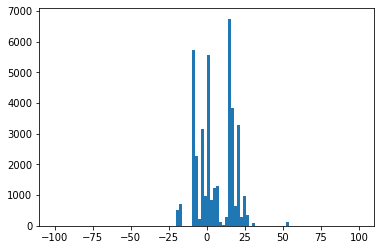

In [63]:
plt.hist(df_loc.Latitude, bins=100, range=[-100,100]);

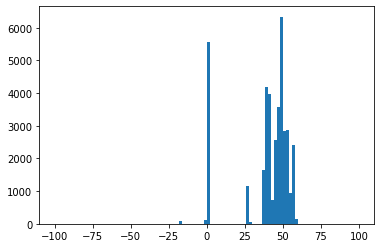

In [65]:
plt.hist(df_loc.Longitude, bins=100, range=[-100,100]);

In [59]:
asd = gpd.points_from_xy([16.575], [47.680])

In [56]:
point = gpd.point

AttributeError: module 'geopandas' has no attribute 'point'

In [113]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [87]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [90]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [94]:
df_loc[df_loc.Latitude > 100]

,Serial,Latitude,Longitude,Type,SensorType,Code,BeginTime,EndTime,tmp,geometry
23652,PI040298AA4C055243,4903185.0,2.0,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_9gvk965b,2019-06-11T13:54:15.000Z,2019-06-17T13:54:03.000Z,2.0,POINT (2.000 4903185.000)
23653,PI040298AA4C055243,4903185.0,2.0,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_9gvk965b,2019-06-11T13:54:15.000Z,2019-06-17T13:54:03.000Z,2.0,POINT (2.000 4903185.000)
23654,PI040298AA4C055243,4903185.0,2.0,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_9gvk965b,2019-06-11T13:54:15.000Z,2019-06-17T13:54:03.000Z,2.0,POINT (2.000 4903185.000)
23655,PI040298AA4C055243,4903185.0,2.0,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_9gvk965b,2019-06-11T13:54:15.000Z,2019-06-17T13:54:03.000Z,2.0,POINT (2.000 4903185.000)
23656,PI040298AA4C055243,4903185.0,2.0,Thingful.Connectors.GROWSensors.SoilMoisture,Flower Power,Grow.Thingful.Sensors_9gvk965b,2019-06-11T13:54:15.000Z,2019-06-17T13:54:03.000Z,2.0,POINT (2.000 4903185.000)
23657,PI040298AA4C055243,4903185.0,2.0,Thingful.Connectors.GROWSensors.WaterTankLevel,Flower Power,Grow.Thingful.Sensors_9gvk965b,2019-06-11T13:54:15.000Z,2019-06-17T13:54:03.000Z,2.0,POINT (2.000 4903185.000)
37746,"PI040307AA4C019989. FuturePractice:,Id:1196,La...",360502.0,465652.0,Thingful.Connectors.GROWSensors.AirTemperature,Flower Power,Grow.Thingful.Sensors_7kzf48dx,2019-10-10T12:38:48.000Z,2019-10-28T15:24:05.000Z,465652.0,POINT (465652.000 360502.000)
37747,"PI040307AA4C019989. FuturePractice:,Id:1196,La...",360502.0,465652.0,Thingful.Connectors.GROWSensors.BatteryLevel,Flower Power,Grow.Thingful.Sensors_7kzf48dx,2019-10-10T12:38:48.000Z,2019-10-28T15:24:05.000Z,465652.0,POINT (465652.000 360502.000)
37748,"PI040307AA4C019989. FuturePractice:,Id:1196,La...",360502.0,465652.0,Thingful.Connectors.GROWSensors.FertilizerLevel,Flower Power,Grow.Thingful.Sensors_7kzf48dx,2019-10-10T12:38:48.000Z,2019-10-28T15:24:05.000Z,465652.0,POINT (465652.000 360502.000)
37749,"PI040307AA4C019989. FuturePractice:,Id:1196,La...",360502.0,465652.0,Thingful.Connectors.GROWSensors.Light,Flower Power,Grow.Thingful.Sensors_7kzf48dx,2019-10-10T12:38:48.000Z,2019-10-28T15:24:05.000Z,465652.0,POINT (465652.000 360502.000)


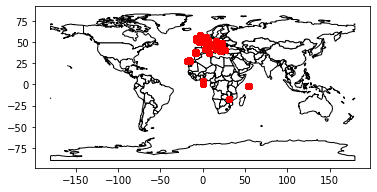

In [114]:
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_loc.plot(ax=ax, color='red')
# gdf.plot(ax=ax, color='red')
plt.show()


In [115]:
df_loc2 = df_loc.copy()

df_loc2['tmp'] = df_loc2['Latitude']
df_loc2['Latitude'] = df_loc2['Longitude']
df_loc2['Longitude'] = df_loc2['tmp']

gdf_loc2 = gpd.GeoDataFrame(df_loc2, geometry=gpd.points_from_xy(df_loc2.Longitude, df_loc2.Latitude))

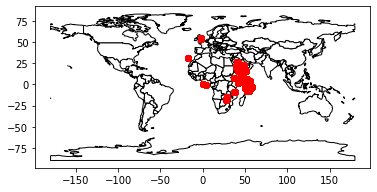

In [116]:
ax = world.plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf_loc2.plot(ax=ax, color='red')
# gdf.plot(ax=ax, color='red')
plt.show()
